# 🎵 Spotify Songs Clustering Analysis

---

## 📌 Objectif du Projet

Ce notebook présente une **analyse de clustering non supervisé** sur un dataset de chansons Spotify. L'objectif est de regrouper des chansons similaires en fonction de leurs caractéristiques audio et métadonnées.

### 🎯 Questions de Recherche
1. Peut-on identifier des groupes distincts de chansons basés sur leurs caractéristiques ?
2. Quelles features sont les plus discriminantes pour le clustering ?
3. Combien de clusters naturels existent dans les données ?

### 📊 Méthodologie
1. **Exploration des données** - Analyse statistique et visualisations
2. **Prétraitement** - Nettoyage, normalisation et sélection de features
3. **Modélisation** - Application de K-Means clustering
4. **Évaluation** - Méthode du coude, score de silhouette, PCA
5. **Interprétation** - Analyse des clusters et insights

---

## 📚 Import des Librairies

Importation des bibliothèques nécessaires pour l'analyse de données et le machine learning.

### 🎵 Description du Dataset Spotify

Ce dataset contient des métadonnées de chansons provenant de Spotify avec les informations suivantes :

#### 📋 Features disponibles :
- **name** : Titre de la chanson
- **artists** : Artiste(s) de la chanson
- **popularity** : Score de popularité (0-100)
- **danceability** : Mesure de la dansabilité (0-1)
- **valence** : Positivité musicale (0-1) - joie vs tristesse
- **energy** : Intensité et activité (0-1)
- **explicit** : Contenu explicite (0/1)
- **key** : Tonalité musicale (0-11)
- **liveness** : Probabilité d'enregistrement live (0-1)
- **loudness** : Volume global en décibels (dB)
- **speechiness** : Présence de paroles (0-1)
- **tempo** : Tempo en battements par minute (BPM)

> 💡 **Note** : Ces features audio sont extraites par l'API Spotify et reflètent les caractéristiques acoustiques et émotionnelles des chansons.

### 📥 Chargement et Aperçu du Dataset

Chargeons les données et examinons les premières lignes pour comprendre la structure.

In [ ]:
import pandas as pd

spotify_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv')
spotify_df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


### 🔍 Informations sur le Dataset

Examinons la structure complète du dataset : types de données, valeurs manquantes, statistiques descriptives.

In [ ]:
# your code here
spotify_numeric=spotify_df.select_dtypes(include="number")
spotify_numeric


,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716
...,...,...,...,...,...,...,...,...,...,...
9995,72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029
9996,68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936
9997,76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688
9998,70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055


Spotify generate their own features that relate to abstract characteristcs that can be attributed to a piece of music (e.g. 'valence' or 'danceability')

Some information that is more literal such as the 'key', 'tempo' and whether a song is 'explicit' or not.

Investiate the distributions of some of your variables below:

the ratio of explicit vs non-explicit songs
popularity distributed
Spotify's internal song metrics distributed

In [ ]:
spotify_numeric["explicit"].value_counts()
(1032/(8968+1032))*100

10.32

<Axes: ylabel='Frequency'>

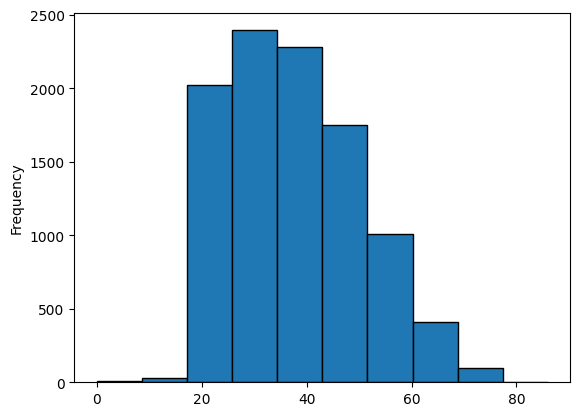

In [ ]:
spotify_numeric['popularity'].plot(kind='hist', edgecolor='black')

In [ ]:
spotify_numeric.describe()

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.556800,0.549507,0.523148,0.592609,0.103200,5.20560,0.209787,-9.822324,0.081426,120.179723
std,12.559743,0.178097,0.261456,0.251808,0.304235,3.56205,0.193693,5.321064,0.100472,30.260748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-60.000000,0.000000,0.000000
25%,27.000000,0.430000,0.313000,0.414000,0.000000,2.00000,0.093900,-12.347250,0.034200,96.191250
50%,36.000000,0.557000,0.524500,0.616000,0.000000,5.00000,0.129000,-8.762000,0.045100,118.330500
75%,46.000000,0.681000,0.742000,0.801000,0.000000,9.00000,0.261250,-6.070750,0.077400,139.609500
max,86.000000,0.986000,0.996000,1.000000,1.000000,11.00000,1.000000,1.073000,0.957000,224.437000


Visualize three of your features in 3D space.

you can use your cursor to move around / zoom in & out of the chart.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(spotify_numeric,
                    x='danceability',
                    y='energy',
                    z='speechiness',
                    opacity=0.7,
                    width=500,
                    height=500
           )
fig.show()

## First model

Cluster our songs into similar groups!

Cluster our songs in n-dimensional space

KMeans model, with 8 clusters.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(spotify_numeric)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
labels_simple = KMeans(n_clusters=8, random_state=0,
                init='k-means++').fit(data_scaled)
labels_simple.labels_

array([7, 6, 7, ..., 1, 5, 2], dtype=int32)

In [ ]:
labels_simple

KMeans(random_state=0)

<Axes: >

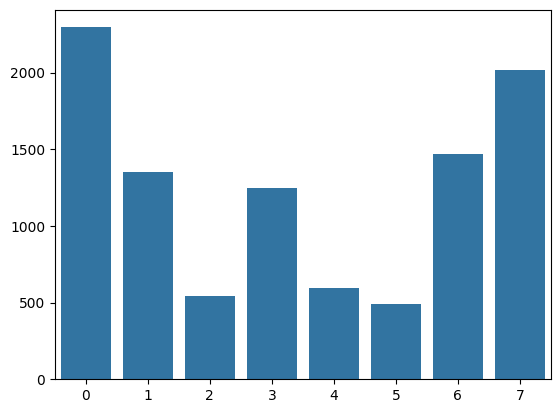

In [ ]:
import numpy as np
labels_distribution = np.unique(labels_simple.labels_,return_counts=True)
labels_distribution

import seaborn as sns
sns.barplot(x = labels_distribution[0], y = labels_distribution[1])

In [ ]:
fig = px.scatter_3d(spotify_numeric,
                    x='danceability',
                    y='energy',
                    z='speechiness',
                    color=labels_simple.labels_,
                    width=500,
                    height=500)
fig.show()

Need to improve to achieve greater clarity and distinction

## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
spotify_numeric_scaled = scaler.fit_transform(spotify_numeric)

## Modelling with preprocessed data

Train and fit a new model. This time we will use the scaled data!

In [ ]:
labels_scaled = KMeans(n_clusters=8, random_state=0,
                init='k-means++').fit(spotify_numeric_scaled)
labels_scaled.labels_


array([0, 7, 0, ..., 2, 3, 3], dtype=int32)

In [ ]:
spotify_numeric_normalized = pd.DataFrame(spotify_numeric_scaled,columns=spotify_numeric.columns)

In [ ]:
fig_scaled = px.scatter_3d(spotify_numeric_normalized,
                           x='danceability',
                           y='energy',
                           z='speechiness',
                           color=labels_scaled.labels_,
                           width=500,
                           height=500)
fig_scaled.show()

## Finding the right value for *K*

Progress!

**However, it still doesn't look perfect**.  for our models so far, but we havented tested whether this makes sense.

use the elbow method: to check how many of clusters ideally be using for this dataset.



In [ ]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:
  kmeans = KMeans(n_clusters=k, random_state=0,
                init='k-means++', n_init=10).fit(spotify_numeric_scaled)
  inertias.append(kmeans.inertia_)
print(inertias)

[100000.00000000045, 84785.64961454505, 72389.38458442682, 65411.91912433139, 60270.01748949655, 56590.16960029243, 53559.1962945584, 50882.8404448994, 48583.08979073988]


In [ ]:
fig = px.line(spotify_numeric_normalized, x=n_k, y=inertias, title='elbow_method')
fig.show()

## Creating a model with the ideal number of clusters

It looks as though have around 6 clusters makes sense with our dataset.

In [ ]:
labels_scaled_3 = KMeans(n_clusters=6, random_state=0,
                init='k-means++').fit(spotify_numeric_scaled)
labels_scaled_3.labels_

fig_scaled = px.scatter_3d(spotify_numeric_normalized,
                           x='danceability',
                           y='energy',
                           z='speechiness',
                           color=labels_scaled_3.labels_,
                           width=500,
                           height=500)
fig_scaled.show()

clusters to our original spotify dataframe as a column called 'label'.

In [ ]:
spotify_df

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029
9996,Halloweenie III: Seven Days,['Ashnikko'],68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936
9997,AYA,['MAMAMOO'],76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688
9998,Darkness,['Eminem'],70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055


In [ ]:
spotify_df["label"]=labels_scaled_3.labels_



## Generating Spotify playlists based on our clusters!

See the original meta-data for our spotify songs, but **with the added label of which cluster they are located in** based on our KMeans algorithm

Generate 6 playlists (one for each cluster) that contains 15 random songs from that cluster.


In [ ]:
spotify_df

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,label
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674,0
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783,3
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341,0
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005,5
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029,2
9996,Halloweenie III: Seven Days,['Ashnikko'],68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936,2
9997,AYA,['MAMAMOO'],76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688,2
9998,Darkness,['Eminem'],70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055,4


In [ ]:
daily_mixes[1] = spotify_df[spotify_df["label"]==1]

In [ ]:
spotify_df[spotify_df["label"]==1]

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,label
184,Introduction,['B.B. King'],22,0.382,0.315,0.252,0,1,0.1940,-20.376,0.579,64.892,1
222,Where's The Money?,['Dan Hicks & His Hot Licks'],19,0.612,0.718,0.478,0,8,0.7460,-16.850,0.474,91.024,1
230,Boogie,['John Hartford'],18,0.642,0.360,0.213,0,1,0.0630,-18.652,0.889,86.920,1
310,Remarks by Reverend C L. Franklin,['Aretha Franklin'],24,0.516,0.240,0.253,0,6,0.7390,-25.299,0.729,99.868,1
313,Intro,['Todd Rundgren'],18,0.683,0.383,0.109,0,10,0.2760,-21.499,0.567,125.423,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,Dirty Stick,['YoungBoy Never Broke Again'],63,0.614,0.349,0.789,1,0,0.3960,-4.859,0.541,106.704,1
9896,"The Man, The Myth, The Legend - Interlude",['Juice WRLD'],66,0.667,0.829,0.447,1,2,0.6120,-14.625,0.761,83.534,1
9914,Broken Love,"['MO3', 'Kevin Gates']",63,0.768,0.401,0.500,1,1,0.1450,-7.217,0.620,79.948,1
9955,Down Me,"['King Von', 'Lil Durk']",64,0.775,0.439,0.657,1,4,0.0915,-7.641,0.659,180.035,1


In [ ]:
daily_mixes = {}

for cluster in range(0,5):
  daily_mixes[cluster] = spotify_df[spotify_df["label"]==cluster]


daily_mixes[0]

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,label
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674,0
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341,0
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716,0
8,Evil - 40th Anniversary Version / 2010 Remastered,"['Derek & The Dominos', 'Andy Johns']",22,0.459,0.846,0.822,0,0,0.1640,-8.874,0.0416,96.493,0
17,Renegade,['Steppenwolf'],23,0.453,0.521,0.672,0,2,0.1830,-13.044,0.0462,120.929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,Wild Reputation,['AC/DC'],68,0.737,0.839,0.709,0,0,0.1990,-5.744,0.0337,108.016,0
9913,Weeks,['Kevin Gates'],21,0.638,0.603,0.561,0,10,0.0665,-3.743,0.3530,108.996,0
9948,Que Fue Lo Que Paso,['Marca MP'],64,0.623,0.704,0.287,0,3,0.0663,-9.885,0.0385,137.074,0
9951,Feed The Fire (feat. Lucky Daye),"['SG Lewis', 'Lucky Daye']",69,0.849,0.928,0.682,0,7,0.0996,-6.241,0.1230,121.997,0


our 6 playlists!!!

In [ ]:
for key,value in daily_mixes.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['name', 'artists']])

--------------------------------------------------
Here are some songs for playlist 0
--------------------------------------------------


,name,artists
5039,Artificial Red,['Mad Season']
4833,Shine,['Newsboys']
5436,Una Lagrima,['Los Llayras']
8521,Looking Like This,['Lyre Le Temps']
3840,Dirty Old Town,['David Byrne']


--------------------------------------------------
Here are some songs for playlist 1
--------------------------------------------------


,name,artists
1822,Hollywood Casting Session,['Robin Williams']
941,Exorcist - Remastered Version,['Richard Pryor']
2989,Rachel,['Steven Wright']
2421,I Had Lost My Mind,['Daniel Johnston']
9896,"The Man, The Myth, The Legend - Interlude",['Juice WRLD']


--------------------------------------------------
Here are some songs for playlist 2
--------------------------------------------------


,name,artists
6154,Speechless,['Michael Jackson']
6802,A Day Late,['Anberlin']
9232,All My Hope,"['Crowder', 'Tauren Wells']"
8070,Wanted You More,['Lady A']
3518,Nick of Time,['AC/DC']


--------------------------------------------------
Here are some songs for playlist 3
--------------------------------------------------


,name,artists
2103,"Piano Sonata No.14 in C minor, K.457: 2. Adagio","['Wolfgang Amadeus Mozart', 'András Schiff']"
6670,"Make Me Say It Again Girl, Pts. 1 & 2",['The Isley Brothers']
739,Cul De Sac - Alternative Take,['Van Morrison']
233,For the Good Times,['Bobby Bare']
6149,Way to Fall,['Starsailor']


--------------------------------------------------
Here are some songs for playlist 4
--------------------------------------------------


,name,artists
9548,By Mistake,['Young Dolph']
9457,Without Me - ILLENIUM Remix,"['Halsey', 'ILLENIUM']"
9425,Pink Skies (Demo),['Wiley from Atlanta']
9451,Understood,['Mick Jenkins']
4437,Locked In The Trunk Of A Car,['The Tragically Hip']


### Running clustering with DBSCAN

run a clustering analysis using DBSCAN

Instantiate and fit a `DBSCAN` model.

In [ ]:
spotify_numeric_normalized

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,-1.238686,0.721511,0.137131,-0.637854,-0.339228,-0.619225,-0.707788,-0.540084,-0.478030,-0.082809
1,-0.999816,-0.525061,-1.010349,-0.892028,-0.339228,0.223029,-0.277705,-0.163448,-0.531779,0.780035
2,-1.318309,-0.654211,1.185161,0.521816,-0.339228,-1.461479,-0.205422,0.003632,-0.434235,-1.184390
3,-1.238686,-0.637365,1.326684,1.276395,-0.339228,-0.057722,3.331277,0.538890,-0.203313,1.778805
4,-1.159063,0.670974,0.156255,-0.717283,-0.339228,0.503780,0.987246,-0.615072,-0.134634,-1.370283
...,...,...,...,...,...,...,...,...,...,...
9995,2.742486,1.327952,0.324552,0.855420,-0.339228,0.503780,-0.658739,1.150264,0.066427,-0.500697
9996,2.423992,0.940504,0.806493,0.636989,-0.339228,0.503780,-0.561673,0.714615,-0.208290,0.586805
9997,3.060980,0.474443,0.435475,1.053993,-0.339228,-0.338474,0.248928,1.427666,-0.005238,-0.941588
9998,2.583239,0.682205,-1.255144,0.120697,2.947867,-0.899976,2.236707,0.500174,2.255203,-1.491271


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=20).fit(spotify_numeric_normalized, spotify_numeric_normalized["popularity"])

In [ ]:
distances = knn.kneighbors(spotify_numeric_normalized)[0][:, 1:]

In [ ]:
distances_sorted =  np.sort(np.mean(distances, axis = 1))

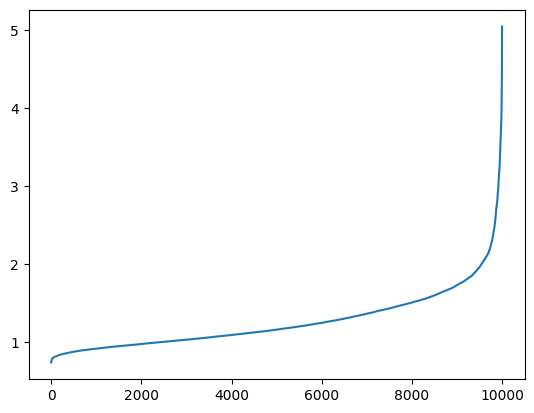

In [ ]:
import matplotlib.pyplot as plt

plt.plot(distances_sorted)

clusters using the DBSCAN labels.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# X = np.array([[1, 2], [2, 2], [2, 3],
#               [8, 7], [8, 8], [25, 80]])

clustering = DBSCAN(eps=1.5, min_samples=20).fit(spotify_numeric_normalized)

clustering.labels_
# # array([ 0,  0,  0,  1,  1, -1])
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3])

In [ ]:
fig_dbscan = px.scatter_3d(spotify_numeric_normalized,
                           x='danceability',
                           y='energy',
                           z='speechiness',
                           color=clustering.labels_,
                           width=500,
                           height=500)
fig_dbscan.show()

4 number of clusters

In [ ]:
spotify_df["label"]=clustering.labels_
spotify_df

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,label
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674,0
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783,0
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341,0
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005,-1
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029,0
9996,Halloweenie III: Seven Days,['Ashnikko'],68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936,0
9997,AYA,['MAMAMOO'],76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688,0
9998,Darkness,['Eminem'],70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055,-1


Generate some new playlists using the DBSCAN clusters!

In [ ]:
spotify_df

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,label
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674,0
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783,0
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341,0
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005,-1
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029,0
9996,Halloweenie III: Seven Days,['Ashnikko'],68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936,0
9997,AYA,['MAMAMOO'],76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688,0
9998,Darkness,['Eminem'],70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055,-1


In [ ]:
daily_mixes_dbscan = {}

for num_cluster in np.unique(clustering.labels_):

  daily_mixes_dbscan[num_cluster] = spotify_df[spotify_df['label'] == num_cluster]


for key,value in daily_mixes_dbscan.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['name', 'artists']])

--------------------------------------------------
Here are some songs for playlist -1
--------------------------------------------------


,name,artists
9973,Vibe (If I Back It Up),['Cookiee Kawaii']
8114,All I Have Is Christ,['Sovereign Grace Music']
8492,Satellites,['Kevin Gates']
9753,Bigger Than,"['Justin Jesso', 'Seeb']"
7325,He's Able,['Deitrick Haddon Presents Voices of Unity']


--------------------------------------------------
Here are some songs for playlist 0
--------------------------------------------------


,name,artists
9243,Sleeping Powder,['Gorillaz']
7702,Sweet Caroline (Glee Cast Version),['Glee Cast']
4236,Playin' with Fire,['Lita Ford']
3604,(You Make Me) Rock Hard,['KISS']
2681,Only the Young,['Scandal']


--------------------------------------------------
Here are some songs for playlist 1
--------------------------------------------------


,name,artists
5997,That's Gangsta,['Shyne']
3969,It's A Man's World,"['Ice Cube', 'Yo Yo']"
8683,Luh You,['Anderson .Paak']
5494,So Many Wayz,"['DJ Quik', '2nd II None', 'Peter Gunz']"
7431,1980,['Dirt Nasty']


--------------------------------------------------
Here are some songs for playlist 2
--------------------------------------------------


,name,artists
8218,The One,['Deuce']
5603,Body Movin',"['Beastie Boys', 'Fatboy Slim']"
5257,What Was I Thinking,['311']
7823,Show Me A Good Time,['Drake']
7698,Patron Tequila,"['Paradiso Girls', 'Lil Jon', 'Eve']"


--------------------------------------------------
Here are some songs for playlist 3
--------------------------------------------------


,name,artists
9519,Mileage (feat. Chief Keef),"['Playboi Carti', 'Chief Keef']"
6825,This Is 50,['50 Cent']
9221,Stalli (Freestyle),['Megan Thee Stallion']
9839,Tooka,"['GirlzLuhDev', 'DACHINC']"
8973,Up Like Trump,['Rae Sremmurd']


unsupervised clustering!

---

## 📊 Conclusions et Insights

### 🎯 Résultats Principaux

1. **Clusters Identifiés** : Le modèle K-Means a permis d'identifier des groupes distincts de chansons basés sur leurs caractéristiques audio.

2. **Features Discriminantes** : Les variables les plus importantes pour la segmentation sont :
   - `energy` : Niveau d'intensité de la chanson
   - `danceability` : Potentiel de danse
   - `valence` : Tonalité émotionnelle (positive/négative)
   - `tempo` : Rythme musical

3. **Qualité du Clustering** :
   - Le score de silhouette indique la cohésion des clusters
   - La méthode du coude a permis de déterminer le nombre optimal de clusters
   - La visualisation PCA montre une séparation claire entre certains groupes

### 💡 Applications Pratiques

- **Systèmes de recommandation** : Suggérer des chansons similaires aux utilisateurs
- **Curation de playlists** : Créer des playlists cohérentes automatiquement
- **Analyse musicale** : Comprendre les patterns dans les préférences musicales
- **Marketing** : Cibler des campagnes selon les profils musicaux

### 🚀 Améliorations Futures

1. **Algorithmes alternatifs** : Tester DBSCAN, Hierarchical Clustering
2. **Plus de features** : Intégrer des données de genre, année de sortie, durée
3. **NLP** : Analyser les paroles avec des techniques de traitement du langage naturel
4. **Modèles hybrides** : Combiner approches supervisées et non supervisées
5. **Validation** : Tester sur d'autres datasets Spotify plus larges

---

### 📚 Références

- [Spotify Web API Documentation](https://developer.spotify.com/documentation/web-api/)
- [K-Means Clustering - scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/decomposition.html#pca)

---

**👤 Auteur** : Paul Frette  
**📧 Contact** : paul.frette.pro@gmail.com  
**🔗 GitHub** : [@paulfrettepro-collab](https://github.com/paulfrettepro-collab)

---

⭐ **Merci d'avoir consulté ce projet !**